# K-近邻算法（KNN）

K nearest neighbour

## 0、导引

### 如何进行电影分类
众所周知，电影可以按照题材分类，然而题材本身是如何定义的?由谁来判定某部电影属于哪
个题材?也就是说同一题材的电影具有哪些公共特征?这些都是在进行电影分类时必须要考虑的问
题。没有哪个电影人会说自己制作的电影和以前的某部电影类似，但我们确实知道每部电影在风格
上的确有可能会和同题材的电影相近。那么动作片具有哪些共有特征，使得动作片之间非常类似，
而与爱情片存在着明显的差别呢？动作片中也会存在接吻镜头，爱情片中也会存在打斗场景，我们
不能单纯依靠是否存在打斗或者亲吻来判断影片的类型。但是爱情片中的亲吻镜头更多，动作片中
的打斗场景也更频繁，基于此类场景在某部电影中出现的次数可以用来进行电影分类。

本章介绍第一个机器学习算法：K-近邻算法，它非常有效而且易于掌握。

## 1、k-近邻算法原理

简单地说，K-近邻算法采用测量不同特征值之间的距离方法进行分类。

- 优点：精度高、对异常值不敏感、无数据输入假定。
- 缺点：时间复杂度高、空间复杂度高。
- 适用数据范围：数值型和标称型。

### 工作原理

存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据
与所属分类的对应关系。输人没有标签的新数据后，将新数据的每个特征与样本集中数据对应的
特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。一般来说，我们
只选择样本数据集中前K个最相似的数据，这就是K-近邻算法中K的出处,通常*K是不大于20的整数。
最后 ，选择K个最相似数据中出现次数最多的分类，作为新数据的分类*。

回到前面电影分类的例子，使用K-近邻算法分类爱情片和动作片。有人曾经统计过很多电影的打斗镜头和接吻镜头，下图显示了6部电影的打斗和接吻次数。假如有一部未看过的电影，如何确定它是爱情片还是动作片呢？我们可以使用K-近邻算法来解决这个问题。

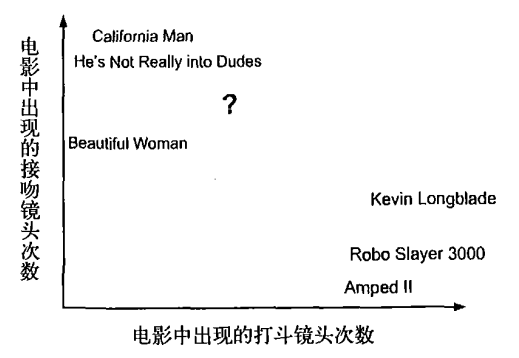

首先我们需要知道这个未知电影存在多少个打斗镜头和接吻镜头，上图中问号位置是该未知电影出现的镜头数图形化展示，具体数字参见下表。

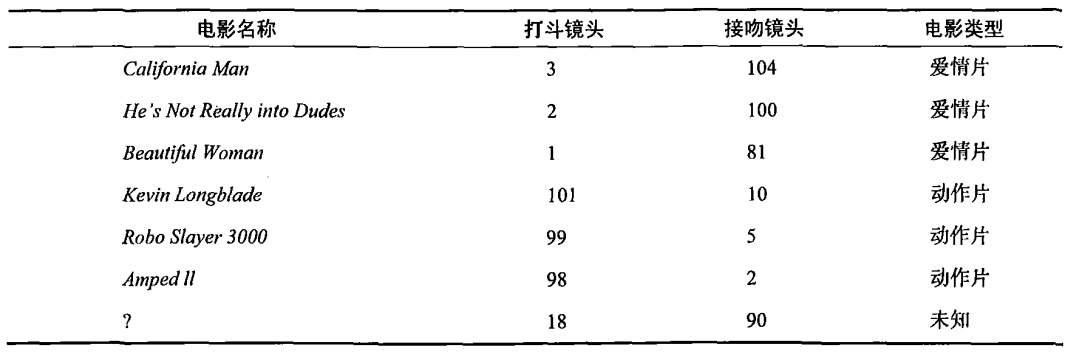

即使不知道未知电影属于哪种类型，我们也可以通过某种方法计算出来。首先计算未知电影与样本集中其他电影的距离，如图所示。

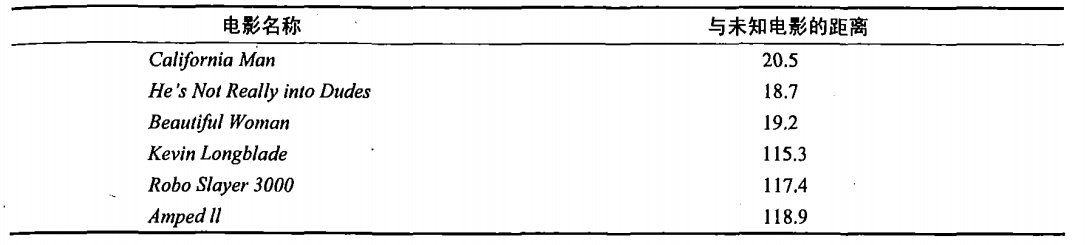

现在我们得到了样本集中所有电影与未知电影的距离，按照距离递增排序，可以找到K个距
离最近的电影。假定k=3，则三个最靠近的电影依次是California Man、He's Not Really into Dudes、Beautiful Woman。K-近邻算法按照距离最近的三部电影的类型，决定未知电影的类型，而这三部电影全是爱情片，因此我们判定未知电影是爱情片。

### 欧几里得距离(Euclidean Distance)

欧氏距离是最常见的距离度量，衡量的是多维空间中各个点之间的绝对距离。公式如下：

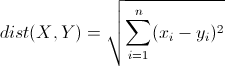

## 2、在scikit-learn库中使用k-近邻算法

- 分类问题：from sklearn.neighbors import KNeighborsClassifier

- 回归问题：from sklearn.neighbors import KNeighborsRegressor

### 0）一个最简单的例子

身高、体重、鞋子尺码数据对应性别

In [1]:
import numpy as np

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
X_train = np.array([[175,65,43],[160,50,37],[180,75,44],[175,55,40],[165,65,41]])

y_labels = ['男','女','男','女','男']

knn = KNeighborsClassifier()

In [5]:
knn.fit(X_train,y_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
#进行预测
x_test = np.array([[172,68,42]])

knn.predict(x_test)

array(['男'], dtype='<U1')

### 1）用于分类

导包，机器学习的算法KNN、数据蓝蝴蝶


In [11]:
import sklearn.datasets as datasets

In [14]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [17]:
#获取数据

data = iris.data
target = iris.target

In [18]:
#导入拆分的工具
from sklearn.model_selection import train_test_split
#让计算机学习一部分数据，另一部分，计算机没有接触过

#让计算机预测没有接触的数据，分类，识别这些数据

In [19]:
X_train,x_test,y_train,y_test = train_test_split(data,target,test_size = 0.1)

In [20]:
#训练
knn = KNeighborsClassifier(n_neighbors= 10) # 样本大的时候可以选取大一点的neighbors 默认值为5
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [28]:
#预测数据
knn.predict(x_test)

array([0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 0, 2])

In [29]:
#真实的结果
y_test

array([0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 1, 2, 0, 2])

In [23]:
x_test.shape

(15, 4)

In [30]:
# 测算法的得分情况
knn.score(x_test,y_test)

0.9333333333333333

In [32]:
knn.score(data,target)

0.98

获取训练样本

In [36]:
data.shape

(150, 4)

In [37]:
data = iris.data
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [38]:
# 绘图 4个参数不好绘制 取2个数据来绘制
data = data[:,:2]
data

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

绘制图形

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

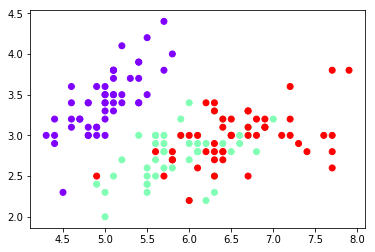

In [42]:
#c = target 代表分类
plt.scatter(data[:,0],data[:,1],c = target,cmap = 'rainbow')

定义KNN分类器

In [43]:
knn = KNeighborsClassifier(10)


第一步，训练数据

In [44]:
# 训练处理之后的数据data

knn.fit(data,target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

第二步预测数据：，所预测的数据，自己创造，就是上面所显示图片的背景点  

生成预测数据

In [47]:
#提取x，y轴的范围
x_min,x_max = data[:,0].min(),data[:,0].max()

y_min,y_max = data[:,1].min(),data[:,1].max()

x = np.linspace(x_min,x_max,1000)
y = np.linspace(y_min,y_max,650)

#np.meshgrid
X,Y = np.meshgrid(x,y)

In [53]:
display(X.shape,Y.shape)

(650, 1000)

(650, 1000)

In [68]:
X

array([[4.3       , 4.3036036 , 4.30720721, ..., 7.89279279, 7.8963964 ,
        7.9       ],
       [4.3       , 4.3036036 , 4.30720721, ..., 7.89279279, 7.8963964 ,
        7.9       ],
       [4.3       , 4.3036036 , 4.30720721, ..., 7.89279279, 7.8963964 ,
        7.9       ],
       ...,
       [4.3       , 4.3036036 , 4.30720721, ..., 7.89279279, 7.8963964 ,
        7.9       ],
       [4.3       , 4.3036036 , 4.30720721, ..., 7.89279279, 7.8963964 ,
        7.9       ],
       [4.3       , 4.3036036 , 4.30720721, ..., 7.89279279, 7.8963964 ,
        7.9       ]])

In [56]:
Y

array([[2.        , 2.        , 2.        , ..., 2.        , 2.        ,
        2.        ],
       [2.003698  , 2.003698  , 2.003698  , ..., 2.003698  , 2.003698  ,
        2.003698  ],
       [2.00739599, 2.00739599, 2.00739599, ..., 2.00739599, 2.00739599,
        2.00739599],
       ...,
       [4.39260401, 4.39260401, 4.39260401, ..., 4.39260401, 4.39260401,
        4.39260401],
       [4.396302  , 4.396302  , 4.396302  , ..., 4.396302  , 4.396302  ,
        4.396302  ],
       [4.4       , 4.4       , 4.4       , ..., 4.4       , 4.4       ,
        4.4       ]])

In [52]:
# X Y 就是图像中所有的点，交叉融合
#np.c_[]

a = [1,2,3]
b = [-1,-2,-5]
#
np.c_[a,b]

array([[ 1, -1],
       [ 2, -2],
       [ 3, -5]])

In [58]:
c = np.array([[4.3,4.4,4.5,4.6],[4.3,4.4,4.5,4.6],[4.3,4.4,4.5,4.6]])

d = np.array([[2,2,2,2],[2.1,2.1,2.1,2.1],[2.2,2.2,2.2,2.2]])
#展开，变成1维
cc = c.ravel()

dd = d.ravel()

np.c_[cc,dd]

array([[4.3, 2. ],
       [4.4, 2. ],
       [4.5, 2. ],
       [4.6, 2. ],
       [4.3, 2.1],
       [4.4, 2.1],
       [4.5, 2.1],
       [4.6, 2.1],
       [4.3, 2.2],
       [4.4, 2.2],
       [4.5, 2.2],
       [4.6, 2.2]])

In [61]:
xy_test = np.c_[X.ravel(),Y.ravel()]

In [65]:
xy_test.shape

(650000, 2)

对数据进行预测

In [66]:
y_ = knn.predict(xy_test)

显示数据

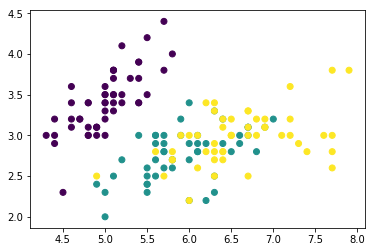

In [66]:
plt.scatter(data[:,0],data[:,1],c = target)

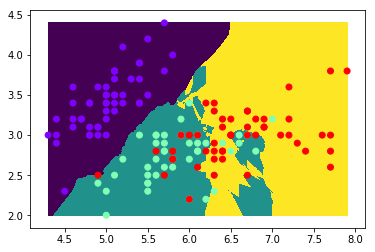

In [67]:
plt.pcolormesh(X,Y,y_.reshape(X.shape))

plt.scatter(data[:,0],data[:,1],c = target,cmap = 'rainbow')

In [70]:
import pandas as pd

In [72]:
df = pd.read_csv('../data/adults.txt')

In [73]:
df.shape

(32561, 15)

In [74]:
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 2）用于回归  
回归用于对趋势的预测  
找到合适的函数，进行后续预测

导包

In [ ]:
#机器学习：分类；回归(预测)

In [69]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

生成样本数据

In [70]:
X_train = np.linspace(0,10*np.pi,200).reshape((200,1))

y_train = np.sin(X_train)

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

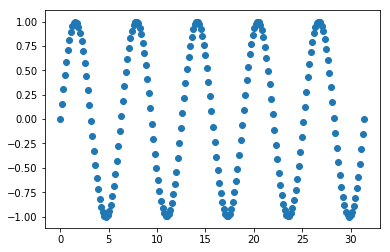

In [72]:
plt.scatter(X_train,y_train)

In [5]:
np.random.randn(10)

array([ 1.42296725, -2.06346052, -0.4434946 ,  1.21124856, -0.28239877,
        0.26382393,  0.81534229,  1.51232772,  1.74928331, -0.22317179])

In [73]:
y_train.shape

(200, 1)

In [75]:
#为结果添加噪声，更加真实
y_train[::4] += 0.2*np.random.randn(50,1)

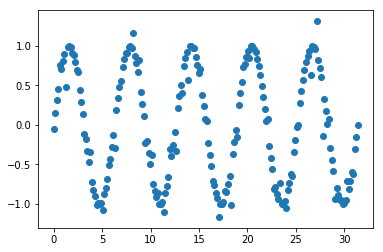

In [76]:
plt.scatter(X_train,y_train)

生成测试数据的结果

第一步：生成模型，并训练数据

In [77]:
X_train.shape

(200, 1)

In [ ]:
[[smaple1],[sample2],[sample3],……] # X_train需要时二维的数据 所以开始使用reshape

In [78]:
knn_regressor = KNeighborsRegressor()

knn_regressor.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

第二步：使用模型，预测数据

In [79]:
#结果就是想要的函数

x_test = np.linspace(0,12*np.pi,10000).reshape((10000,1))

y_ = knn_regressor.predict(x_test)

绘图显示数据

In [80]:
x_test.shape

(10000, 1)

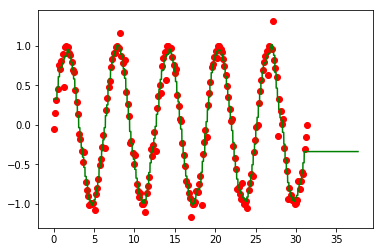

In [81]:
plt.scatter(X_train,y_train,c = 'r')

#预测出来函数，进行绘制
plt.plot(x_test,y_,'green')

### 练习
人类动作识别  
步行，上楼，下楼，坐着，站立和躺着  
![](stand-sit-run.jpg)  
数据采集每个人在腰部穿着智能手机，进行了六个活动（步行，上楼，下楼，坐着，站立和躺着）。采用嵌入式加速度计和陀螺仪，以50Hz的恒定速度捕获3轴线性加速度和3轴角速度，来获取数据

导入数据

In [82]:
a = np.array([0,1,2,3])
np.save('./data111',a)

In [83]:
np.load('./data111.npy')

array([0, 1, 2, 3])

In [84]:
X_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')


#加载预测的数据
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [85]:
X_train.shape

(7352, 561)

In [87]:
X_train[0]

array([ 0.28858451, -0.02029417, -0.13290514, -0.9952786 , -0.98311061,
       -0.91352645, -0.99511208, -0.98318457, -0.92352702, -0.93472378,
       -0.56737807, -0.74441253,  0.85294738,  0.68584458,  0.81426278,
       -0.96552279, -0.99994465, -0.99986303, -0.99461218, -0.99423081,
       -0.98761392, -0.94321999, -0.40774707, -0.67933751, -0.60212187,
        0.92929351, -0.85301114,  0.35990976, -0.05852638,  0.25689154,
       -0.22484763,  0.26410572, -0.09524563,  0.27885143, -0.46508457,
        0.49193596, -0.19088356,  0.37631389,  0.43512919,  0.66079033,
        0.96339614, -0.14083968,  0.11537494, -0.98524969, -0.98170843,
       -0.87762497, -0.98500137, -0.98441622, -0.89467735,  0.89205451,
       -0.16126549,  0.12465977,  0.97743631, -0.12321341,  0.05648273,
       -0.37542596,  0.89946864, -0.97090521, -0.97551037, -0.98432539,
       -0.98884915, -0.91774264, -1.        , -1.        ,  0.11380614,
       -0.590425  ,  0.5911463 , -0.59177346,  0.59246928, -0.74

In [91]:
y_train[::100]

array([5, 1, 5, 3, 4, 2, 6, 5, 3, 6, 5, 1, 4, 2, 1, 5, 2, 1, 4, 2, 1, 4,
       2, 6, 5, 3, 6, 2, 1, 5, 3, 4, 3, 4, 3, 6, 3, 6, 5, 6, 5, 6, 5, 6,
       5, 3, 6, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 3, 4, 3, 4,
       3, 6, 5, 1, 4, 3, 4, 3])

In [92]:
label = {1:'WALKING', 2:'WALKING UPSTAIRS', 
         3:'WALKING DOWNSTAIRS',4:'SITTING', 5:'STANDING', 6:'LAYING'}

获取数据

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn_classifier = KNeighborsClassifier(10)

knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [98]:
x_test.shape

(2947, 561)

In [99]:
y_ = knn_classifier.predict(x_test[:500])

In [100]:
y_[::5]

array([5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 4, 4, 4, 4, 6, 6, 6,
       6, 6, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 5, 5, 4, 4, 5,
       4, 4, 4, 5, 5, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3,
       2, 2, 2, 2, 2, 2, 5, 5, 4, 5, 5, 4])

In [101]:
y_test[:500][::5]

array([5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 4, 4, 4, 4, 6, 6, 6,
       6, 6, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5,
       4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 4])

In [102]:
knn_classifier.score(x_test,y_test)

0.9066847641669494

In [104]:
y_train[:200]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5])

In [105]:
np.argwhere(y_train == 6)

array([[  51],
       [  52],
       [  53],
       ...,
       [7259],
       [7260],
       [7261]])

In [107]:
#索引：步行，上楼，下楼，坐着，站着，躺着
inds = [78,152,125,7227,2,52]

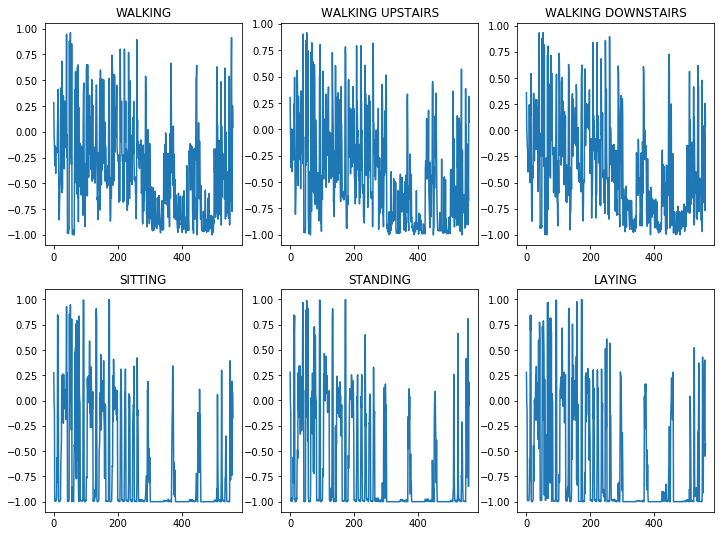

In [110]:
plt.figure(figsize=(12,9))
for i,index in enumerate(inds):
    
    data = X_train[index]
    
    axes = plt.subplot(2,3,(i+1))
    
    axes.plot(data)
    
    axes.set_title(label[(i+1)])

绘制

## 3、作业

#### 1、预测年收入是否大于50K美元

读取adult.txt文件，最后一列是年收入，并使用KNN算法训练模型，然后使用模型预测一个人的年收入是否大于50

In [112]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier # 只有是否 所以是分类问题

In [149]:
salary = pd.read_csv('../data/salary.txt')
salary.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


获取年龄、教育程度、职位、每周工作时间作为机器学习数据  
获取薪水作为对应结果

In [114]:
salary.columns

Index(['age', 'workclass', 'final_weight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [150]:
x_data = salary[['age','workclass','education','occupation','race','sex','hours_per_week']].copy()

#将数据对应的结果提取
y_target = salary[['salary']]

In [117]:
y_target

,salary
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
5,<=50K
6,<=50K
7,>50K
8,>50K
9,>50K


In [151]:
x_data.dtypes

age                int64
workclass         object
education         object
occupation        object
race              object
sex               object
hours_per_week     int64
dtype: object

数据转换，将String类型数据转换为int

【知识点】map方法，进行数据转换

In [152]:
workclass = x_data['workclass'].unique()
workclass

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [153]:
np.argwhere(workclass == 'Without-pay')[0,0]

7

In [154]:
def convert2int(item):
    
    return np.argwhere(workclass == item)[0,0] + 1

In [155]:
#four --->for

#two ---->to:目的
x_data['workclass'] = x_data['workclass'].map(convert2int)

In [156]:
x_data.head()

,age,workclass,education,occupation,race,sex,hours_per_week
0,39,1,Bachelors,Adm-clerical,White,Male,40
1,50,2,Bachelors,Exec-managerial,White,Male,13
2,38,3,HS-grad,Handlers-cleaners,White,Male,40
3,53,3,11th,Handlers-cleaners,Black,Male,40
4,28,3,Bachelors,Prof-specialty,Black,Female,40


In [157]:
columns = ['education','occupation','race','sex']


for col in columns:
    
    unique = x_data[col].unique()
    
    def convert2int(item):
        
        return np.argwhere(unique == item)[0,0] + 1
    
    x_data[col] = x_data[col].map(convert2int)

In [159]:
x_data.head()

,age,workclass,education,occupation,race,sex,hours_per_week
0,39,1,1,1,1,1,40
1,50,2,1,2,1,1,13
2,38,3,2,3,1,1,40
3,53,3,3,3,2,1,40
4,28,3,1,4,2,2,40


切片：训练数据和预测数据

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train,x_test,y_train,y_test = train_test_split(x_data,y_target,train_size = 0.88)

/Users/rottengeek/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [162]:
X_train.shape

(28653, 7)

In [164]:
type(X_train)

pandas.core.frame.DataFrame

生成算法

In [167]:
#样本越小，条件苛刻
knn = KNeighborsClassifier(10)

第一步：训练数据

In [168]:
y_train_s = y_train['salary'] # 二维变成一维

In [169]:
#pandas 数据结构可以直接应用到机器学习，衔接紧密，量身定做

knn.fit(X_train,y_train_s)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

第二步：预测数据

In [172]:
knn.predict(x_test[:20])

array(['<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K',
       '<=50K', '<=50K', '<=50K', '>50K', '>50K', '<=50K', '<=50K',
       '<=50K', '<=50K', '<=50K', '>50K', '<=50K', '<=50K'], dtype=object)

In [171]:
y_test[:20]

,salary
11922,<=50K
12648,<=50K
23448,<=50K
467,<=50K
3781,<=50K
16512,<=50K
9554,<=50K
27892,>50K
15354,<=50K
27377,<=50K


In [91]:
#k == 20
knn.score(x_test,y_test)

0.77686796315250772

In [94]:
# k == 5
knn.score(x_test,y_test)

0.75972364380757418

In [97]:
#k == 50
knn.score(x_test,y_test)

0.77405322415557831

In [100]:
# k == 10
knn.score(x_test,y_test)

0.77610030706243605

保存训练模型  
from sklearn.externals import joblib

In [175]:
from sklearn.externals import joblib

In [176]:
# knn 保存起来
#model = 模型
joblib.dump(knn,'./salary.m')

['./salary.m']

In [177]:
#使用已有模型进行数据的预测

existed_knn = joblib.load('./salary.m')

In [178]:
existed_knn.score(x_test,y_test)

0.7840327533265097

In [105]:
#X_train 进行归一化处理

# 图片颜色：0~255 对颜色进行归一化处理 [0,1.0]
X_train

#归一化处理之后，进行机器学习，比较一下，进行归一化之后，看看score得分情况，

,age,workclass,education,occupation,race,sex,hours_per_week
22363,46,3,6,1,1,2,24
27114,56,3,13,5,2,2,45
1703,29,3,2,7,1,2,50
15397,40,3,8,6,1,1,50
3356,29,3,8,1,1,2,40
4778,28,6,9,12,1,1,84
4455,48,2,9,7,1,1,40
32337,23,3,1,4,3,1,55
26665,66,3,6,8,1,1,20
26139,28,3,2,8,1,1,50


In [179]:
x_data['age'].max()

90

In [180]:
X_train['age'] = X_train['age'].map(lambda x: x/90)

/Users/rottengeek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [181]:
X_train

,age,workclass,education,occupation,race,sex,hours_per_week
932,0.566667,5,15,5,1,1,40
28986,0.444444,3,6,10,1,1,40
30184,0.277778,3,6,4,1,2,40
17569,0.522222,3,2,7,1,1,40
19443,0.400000,5,6,1,4,1,40
1049,0.400000,3,1,4,1,1,50
10228,0.277778,1,6,2,1,2,19
24980,0.411111,3,6,7,3,1,40
3693,0.777778,3,2,1,1,2,5
31809,0.600000,4,2,2,1,1,40


In [182]:
knn = KNeighborsClassifier(10)

In [183]:
knn.fit(X_train,y_train)

/Users/rottengeek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [184]:
x_test['age'] = x_test['age'].map(lambda x : x/90)

/Users/rottengeek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [185]:
knn.score(x_test,y_test)

0.7952917093142272

In [187]:
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
X

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667,
        0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714,
        0.125     , 0.11111111, 0.1       , 0.09090909, 0.08333333],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ,
        0.11111111, 0.1       , 0.09090909, 0.08333333, 0.07692308],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
        0.1       , 0.09090909, 0.08333333, 0.07692308, 0.07142857],
       [0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667],
       [0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909,
        0.08333333, 0.07692308, 0.07142857, 0.06666667, 0.0625    ],
       [0.125     , 0.11111111, 0.1      

#### 2、小麦种类预测

读取seeds.tsv文件，最后一列是小麦品种，其他列是小麦特征

#### 3、改进约会网站的匹配效果

读取datingTestSet.txt文件，最后一列是喜欢程度。模型：根据前几列的信息，预测喜欢程度